In [13]:
# Dependencies and Setup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from datetime import date

In [14]:
# Read in merged csv file and display data
ins_claim_fraud = pd.read_csv("CSV Files/insurance_claims_data.csv")
ins_claim_fraud.head()

,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFFECTIVE_DATE,LOSS_DATE,REPORT_DATE,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,...,VENDOR_ID,AGENT_NAME,DATE_OF_JOINING,EMPLOYEE CITY,EMPLOYEE STATE,EMPLOYEE POSTAL_CODE,VENDOR_NAME,VENDOR CITY,VENDOR STATE,VENDOR POSTAL_CODE
0,TXN00000001,A00003822,PLC00008468,6/23/2015,5/16/2020,5/21/2020,Health,157.13,9000,Christopher Demarest,...,VNDR00556,Amy Wangler,1/6/1994,Nashville,TN,37217,Ramsey Inc,Panama City,FL,32405.0
1,TXN00000258,A00003072,PLC00008557,2/15/2014,5/27/2020,6/1/2020,Life,57.15,54000,Tommy Young,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
2,TXN00002428,A00001447,PLC00004391,1/30/2015,8/23/2020,8/28/2020,Life,65.06,13000,Kathy Keim,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
3,TXN00002811,A00001822,PLC00009369,8/22/2012,9/6/2020,9/11/2020,Life,87.16,42000,George Schmidt,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
4,TXN00002861,A00006019,PLC00006747,2/5/2017,9/14/2020,9/17/2020,Mobile,11.85,500,Allan Baumeister,...,VNDR00344,Amy Wangler,1/6/1994,Nashville,TN,37217,Lewis Ltd,Montgomery,AL,36104.0


# What percentage of these false claims are accepted?
----
### Of those accepted claims, are police reports usually available?

In [15]:
# Count total number of accepted and denied claims
claim_status_count = ins_claim_fraud["CLAIM_STATUS"].value_counts()
claim_status_count

CLAIM_STATUS
A    9497
D     503
Name: count, dtype: int64

In [16]:
# Only locate accepted claims
accepted_count = ins_claim_fraud.loc[ins_claim_fraud["CLAIM_STATUS"]=="A"]
accepted_count

,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFFECTIVE_DATE,LOSS_DATE,REPORT_DATE,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,...,VENDOR_ID,AGENT_NAME,DATE_OF_JOINING,EMPLOYEE CITY,EMPLOYEE STATE,EMPLOYEE POSTAL_CODE,VENDOR_NAME,VENDOR CITY,VENDOR STATE,VENDOR POSTAL_CODE
0,TXN00000001,A00003822,PLC00008468,6/23/2015,5/16/2020,5/21/2020,Health,157.13,9000,Christopher Demarest,...,VNDR00556,Amy Wangler,1/6/1994,Nashville,TN,37217,Ramsey Inc,Panama City,FL,32405.0
1,TXN00000258,A00003072,PLC00008557,2/15/2014,5/27/2020,6/1/2020,Life,57.15,54000,Tommy Young,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
2,TXN00002428,A00001447,PLC00004391,1/30/2015,8/23/2020,8/28/2020,Life,65.06,13000,Kathy Keim,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
4,TXN00002861,A00006019,PLC00006747,2/5/2017,9/14/2020,9/17/2020,Mobile,11.85,500,Allan Baumeister,...,VNDR00344,Amy Wangler,1/6/1994,Nashville,TN,37217,Lewis Ltd,Montgomery,AL,36104.0
5,TXN00004555,A00001370,PLC00006231,11/24/2016,11/29/2020,11/29/2020,Mobile,11.79,500,Patrica Norris,...,VNDR00520,Amy Wangler,1/6/1994,Nashville,TN,37217,"Kane, Beard and Cox",Arvada,CO,80004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN00008381,A00006144,PLC00005140,10/23/2012,4/15/2021,4/20/2021,Life,64.16,93000,Ana Garcia,...,VNDR00378,Angel Alexander,8/26/2012,Manchester,CT,6040,"Reed, Bartlett and Miles",Savannah,GA,31401.0
9996,TXN00008462,A00004250,PLC00009507,8/30/2019,4/20/2021,4/25/2021,Mobile,9.76,300,Roy Sipp,...,NaN,Angel Alexander,8/26/2012,Manchester,CT,6040,NaN,NaN,NaN,NaN
9997,TXN00009410,A00004412,PLC00005536,11/25/2019,6/5/2021,6/5/2021,Motor,97.78,3000,Josephine Williams,...,VNDR00580,Angel Alexander,8/26/2012,Manchester,CT,6040,Dennis LLC,Nashville,TN,37207.0
9998,TXN00009756,A00003267,PLC00007273,9/29/2012,6/1/2021,6/6/2021,Mobile,7.64,200,Daniel Benninger,...,VNDR00383,Angel Alexander,8/26/2012,Manchester,CT,6040,"Dawson, Taylor and Chavez",Norwood,MA,2062.0


In [37]:
# Only locate denied claims
denied_claims = ins_claim_fraud.loc[ins_claim_fraud["CLAIM_STATUS"]=="D"]
denied_claims

,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFFECTIVE_DATE,LOSS_DATE,REPORT_DATE,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,...,VENDOR_ID,AGENT_NAME,DATE_OF_JOINING,EMPLOYEE CITY,EMPLOYEE STATE,EMPLOYEE POSTAL_CODE,VENDOR_NAME,VENDOR CITY,VENDOR STATE,VENDOR POSTAL_CODE
3,TXN00002811,A00001822,PLC00009369,8/22/2012,9/6/2020,9/11/2020,Life,87.16,42000,George Schmidt,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
13,TXN00000353,A00009612,PLC00007826,5/6/2016,6/8/2020,6/10/2020,Property,141.30,28000,Dreama Scurry,...,VNDR00463,Jessica Montez,5/28/2004,Glendale,AZ,85301,Perez-Rosario,Millersville,MD,21108.0
40,TXN00005702,A00006792,PLC00003831,12/12/2011,12/30/2020,1/4/2021,Mobile,11.99,500,Tom Taylor,...,VNDR00193,Patricia Tucker,6/12/2007,Norman,OK,73071,Hensley-Day,Fayetteville,AR,72703.0
46,TXN00001155,A00007364,PLC00003643,5/2/2016,7/11/2020,7/12/2020,Motor,137.78,2000,Huong Clay,...,VNDR00540,Brenda Bean,1/19/2010,Glen Burnie,MD,21061,"Fuller, Smith and Black",Fayetteville,AR,72701.0
71,TXN00007743,A00002213,PLC00003250,1/10/2019,3/22/2021,3/27/2021,Travel,77.82,1000,Edward Simmons,...,NaN,Edgar Talley,6/2/2013,East Longmeadow,MA,1028,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,TXN00005789,A00008543,PLC00009042,10/19/2015,12/31/2020,1/5/2021,Property,143.36,26000,Judy Linn,...,NaN,Robin White,8/9/2008,Savannah,GA,31404,NaN,NaN,NaN,NaN
9895,TXN00007324,A00002729,PLC00006018,7/7/2015,3/10/2021,3/12/2021,Travel,52.56,4000,Juan Jones,...,VNDR00306,Linda Grier,7/19/1996,Pleasanton,CA,94588,Hubbard LLC,Montgomery,AL,36117.0
9953,TXN00005900,A00009702,PLC00005035,7/27/2013,1/4/2021,1/9/2021,Mobile,11.81,400,Linda Snider,...,VNDR00043,Carlos Nelson,11/16/2006,Anchorage,AK,99508,Poole Ltd,Castro Valley,CA,94546.0
9975,TXN00008590,A00000442,PLC00008706,10/31/2010,4/21/2021,4/26/2021,Property,142.48,13000,Patrick Mchendry,...,NaN,Floyd Ruiz,6/22/2002,Eureka,CA,95501,NaN,NaN,NaN,NaN


In [17]:
# Count employment status of accepted claims
police_count = accepted_count["POLICE_REPORT_AVAILABLE"].value_counts()
police_count

POLICE_REPORT_AVAILABLE
1    6579
0    2918
Name: count, dtype: int64

In [38]:
# Count employment status of denied claims
police_count_denied = denied_claims["POLICE_REPORT_AVAILABLE"].value_counts()
police_count_denied

POLICE_REPORT_AVAILABLE
1    349
0    154
Name: count, dtype: int64

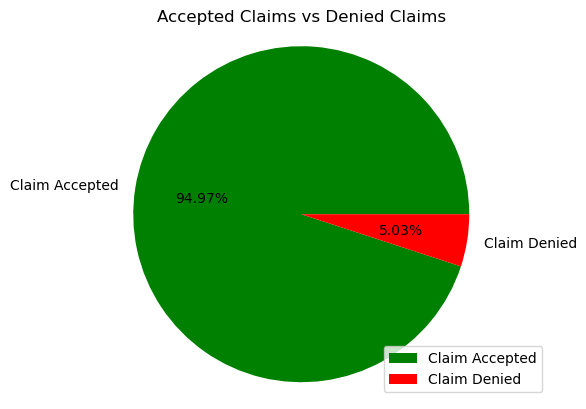

In [18]:
# Pie chart of Accepted vs Denied Claims
labels = ['Claim Accepted', 'Claim Denied']
claim_status_count.plot(kind="pie", colors=['g','r'], labels = labels, autopct= "%1.2f%%")

# Label plot
plt.title("Accepted Claims vs Denied Claims")
plt.legend(labels, loc="lower right")
plt.axis('equal')
plt.ylabel("")

# Save plot
plt.savefig('Images/Accepted_vs_Denied_Claims.png')
# Show plot
plt.show()

As depicted in the pie chart above, almost 95% of the fraudulent claims from this dataset have been accepted. As a result, we can look into what the accepted claims have been doing to achieve these successful claims. There are many columns in the csv file which may point to potential explanations as to why so many of these claims have been successful. We can view many aspects of the individual and the claim itself, such as the people's social class and the claims that include a police report.

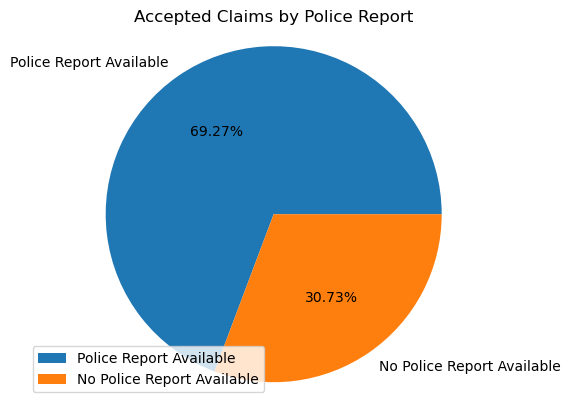

In [42]:
# Pie chart to show accpepted claims police reports
police_count.plot(kind="pie", autopct= "%1.2f%%", labels = ["Police Report Available",
                                                                             "No Police Report Available"])

# Label Plot
plt.title("Accepted Claims by Police Report")
plt.legend(loc="lower left")
plt.axis('equal')
plt.ylabel("")

# Save plot
plt.savefig('Images/Accepted_Police_Report.png')
# Show plot
plt.show()

When creating a pie chart to see how many of the accepted false claims included a police report, we see that nearly 70% of them had one. This makes it strongly evident that having a police report makes these false claims far more likely to go through.

# Which false claim amounts are most common?
----
### Of the 5 most common claim amounts, what is their social class?

In [20]:
# Displays claim amounts from most to least common
claim_amount_count = ins_claim_fraud["CLAIM_AMOUNT"].value_counts().sort_values(ascending = False)
claim_amount_count

CLAIM_AMOUNT
1000     585
2000     584
5000     573
4000     567
3000     563
        ... 
62000     12
88000     12
94000     11
98000     11
66000     10
Name: count, Length: 107, dtype: int64

In [21]:
# Create dataframe of most common claim amounts
claim_amount_common = ins_claim_fraud.loc[(ins_claim_fraud["CLAIM_AMOUNT"]==1000) |
                                          (ins_claim_fraud["CLAIM_AMOUNT"] == 2000) |
                                          (ins_claim_fraud["CLAIM_AMOUNT"] == 5000) |
                                          (ins_claim_fraud["CLAIM_AMOUNT"] == 4000) |
                                          (ins_claim_fraud["CLAIM_AMOUNT"] == 3000),:]
claim_amount_common

,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFFECTIVE_DATE,LOSS_DATE,REPORT_DATE,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,...,VENDOR_ID,AGENT_NAME,DATE_OF_JOINING,EMPLOYEE CITY,EMPLOYEE STATE,EMPLOYEE POSTAL_CODE,VENDOR_NAME,VENDOR CITY,VENDOR STATE,VENDOR POSTAL_CODE
6,TXN00004594,A00009638,PLC00001802,2/17/2016,11/28/2020,11/29/2020,Health,112.11,5000,Leroy Sierra,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
16,TXN00002204,A00007198,PLC00007652,1/31/2017,8/10/2020,8/15/2020,Travel,68.56,1000,Guy Bouchard,...,NaN,Jessica Montez,5/28/2004,Glendale,AZ,85301,NaN,NaN,NaN,NaN
18,TXN00006639,A00007131,PLC00001711,6/24/2013,2/11/2021,2/13/2021,Travel,74.85,3000,Philip Claytor,...,VNDR00074,Jessica Montez,5/28/2004,Glendale,AZ,85301,Fox-Anderson,Berkeley,CA,94708.0
19,TXN00007091,A00001879,PLC00006641,10/16/2011,2/23/2021,2/28/2021,Travel,64.25,1000,Carol Berg,...,NaN,Jessica Montez,5/28/2004,Glendale,AZ,85301,NaN,NaN,NaN,NaN
22,TXN00008575,A00008596,PLC00001661,2/5/2013,4/24/2021,4/29/2021,Motor,96.00,3000,Eugene Tasler,...,VNDR00460,Jessica Montez,5/28/2004,Glendale,AZ,85301,Hubbard Inc,Annapolis,MD,21402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,TXN00006828,A00005361,PLC00006722,3/13/2016,2/13/2021,2/18/2021,Travel,71.20,3000,David Nelson,...,NaN,Clarence Saul,2/7/2015,Savannah,GA,31404,NaN,NaN,NaN,NaN
9980,TXN00009882,A00003724,PLC00009867,3/2/2011,6/10/2021,6/15/2021,Motor,100.89,3000,Michael Westcott,...,VNDR00186,Clarence Saul,2/7/2015,Savannah,GA,31404,Smith PLC,Anchorage,AK,99515.0
9988,TXN00008461,A00003414,PLC00008296,7/20/2011,4/22/2021,4/25/2021,Travel,87.33,2000,James Grant,...,NaN,Sherman Dammen,2/15/2008,Montgomery,AL,36116,NaN,NaN,NaN,NaN
9993,TXN00008531,A00001635,PLC00006412,11/12/2013,4/24/2021,4/29/2021,Health,108.90,2000,Mildred Macias,...,NaN,Alan Henriquez,5/12/2012,Louisville,KY,40272,NaN,NaN,NaN,NaN


In [22]:
# Count social class of people who file most common claim amounts
social_class_count = claim_amount_common["SOCIAL_CLASS"].value_counts()
social_class_count

SOCIAL_CLASS
MI    1402
LI     788
HI     682
Name: count, dtype: int64

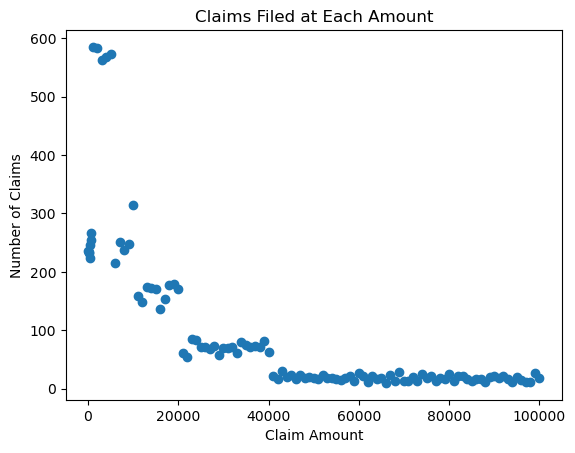

In [23]:
# Create Scatterplot of cclaims filed at each amount 
plt.scatter(claim_amount_count.index,claim_amount_count)  

# Label Plot
plt.xlabel("Claim Amount")
plt.ylabel("Number of Claims")
plt.title("Claims Filed at Each Amount")

# Save plot
plt.savefig('Images/Claims_Per_Amount.png')
# Show plot
plt.show()


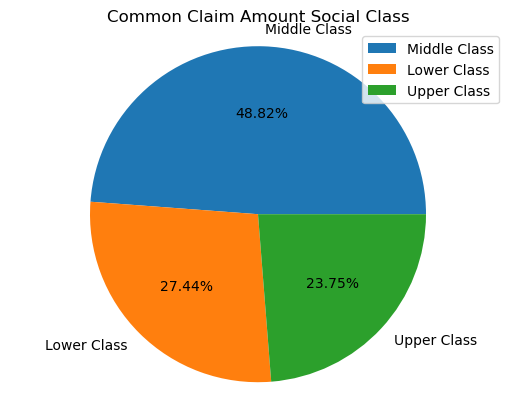

In [24]:
# Pie plot common false claim amount per social class
labels = ['Middle Class', 'Lower Class','Upper Class']
social_class_count.plot(kind="pie", labels = labels, autopct= "%1.2f%%")

# Label Plot
plt.title("Common Claim Amount Social Class")
plt.legend(labels, loc="upper right")
plt.axis('equal')
plt.ylabel("")

# Save Pie Chart
plt.savefig('Images/Claims_Per_Social_Class.png')
# Display Chart
plt.show()

# Are false claims more likely to be made later on in the day?
------
### Is there any correlation/what times are most common to receive false claims?

In [25]:
# Count unique number of hours in which claims have been filed
incident_hour_unique = len(ins_claim_fraud["INCIDENT_HOUR_OF_THE_DAY"].unique())
incident_hour_unique

24

In [26]:
# Value count to see how many false claims have been made during each hour of the day
incident_hour_count = ins_claim_fraud["INCIDENT_HOUR_OF_THE_DAY"].value_counts()
incident_hour_count

INCIDENT_HOUR_OF_THE_DAY
15    462
6     461
18    445
17    441
22    440
10    436
5     434
19    430
9     414
14    413
16    411
11    411
13    409
21    404
0     404
2     403
8     403
20    402
4     402
12    402
23    401
3     395
7     394
1     383
Name: count, dtype: int64

The r value is: 0.297


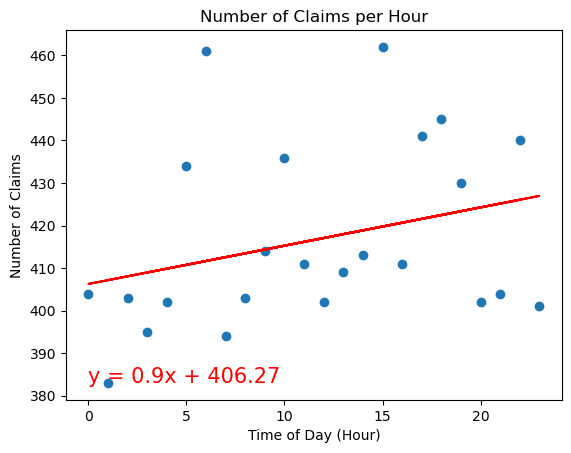

In [27]:
# Scatterplot with labels
plt.scatter(incident_hour_count.index,incident_hour_count)
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Number of Claims")
plt.title("Number of Claims per Hour")

# Linregress function to get line of best fit/see if there is correlation in the data
(slope, intercept, r, p, err) = linregress(incident_hour_count.index,incident_hour_count)

# Round the slope, intercept, and r value outputs to simplify values
slope = round(slope,2)
intercept = round(intercept,2)
r = round(r,3)

# Create line equation using linregress() outputs
line_eqn = (slope*incident_hour_count.index) + intercept

# Plot line equation on scatterplot
plt.plot(incident_hour_count.index,line_eqn, color = "red")
# Plot equation text at min(x_axis),min(y_axis) so equation displays in bottom left corner
plt.text(min(incident_hour_count.index),min(incident_hour_count),f"y = {slope}x + {intercept}", color = "red", size = 15)
print(f"The r value is: {r}")

# Save Plot
plt.savefig('Images/Claims_Per_Hour_Scatter.png')

# Show plot
plt.show()


Correlation is determined by examining the trends in data and determining whether one aspect of data affects another. We have decided to test for correlation by comparing the time of day to the number of claims that occur each hour. The above plot places a datapoint at each hour to depict how many claims occurred within each hour. As depicted in the scatterplot, there is minimal correlation between the number of false claims being made versus the hour of the day. When calculating the r value using the linregress() function, we have r = 0.297. Because the r value is close to 0, we can assume the correlation is weak. When looking at the line of best fit on the graph, we can clearly see that the line doesn't necessarily fit the data too well. As a result, we cannot firmly conclude that you are more likely to have false claims occur later in the day versus earlier.

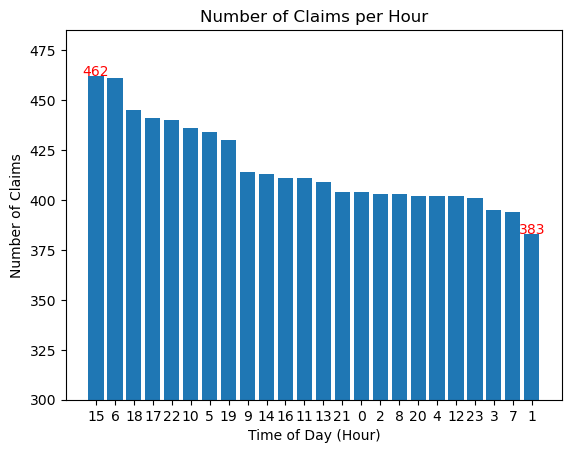

In [28]:
# Create bar plot of Claims per hour, sort by descending claim count
plt.bar(incident_hour_count.index.sort_values(),incident_hour_count)

#Create blank list and use for loop to append index values of incident_hour_count to list
claim_hour = []
for x in range(0,incident_hour_unique):
    claim_hour.append(incident_hour_count.index[x])

# Convert list to string so we can set the labels for the plot as string values
claim_hour = map(str,claim_hour)

# Plot x-ticks, making the range 0 to value count of incident hours and labels = new list
plt.xticks(range(0,incident_hour_unique), labels = list(claim_hour))
# Set min y value to 300 to see the difference more clearly
plt.ylim(bottom = 300)

# Plot exact value count of claims for most claims and least claims
plt.text(min(incident_hour_count.index),max(incident_hour_count), max(incident_hour_count), ha = 'center', color = 'r')
plt.text(max(incident_hour_count.index),min(incident_hour_count), min(incident_hour_count), ha = 'center', color = 'r')

# Label plot
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Number of Claims")
plt.title("Number of Claims per Hour")

# Save plot
plt.savefig('Images/Claims_Per_Hour_Bar.png')
# Show plot
plt.show()


An easy way to visualize the data to see how many claims are being made each hour is to create a bar plot in which we organize the x-axis by descending number of false claims. As we can see, we have ordered the x-axis to provide the greatest number of false claims at the left, and the least number towards the right. We can see from the bar plot that there are many claims made every hour, with the most being placed at the 15th hour and the least being placed at the 1st hour. With this being said, there is still a substantial amount of claims that are being placed every hour. Despite the fact that there is a difference of 79 claims from the 15th hour to the 1st hour, there are still, at least, 383 claims being made at each hour. This goes to show that many false claims have been made during all hours of the day.

# What is the average payout for each type of insurance?

In [29]:
# What is the average cost for each type of insurance?
# Average claim amount?

avg_cost = ins_claim_fraud.groupby(['INSURANCE_TYPE'])['PREMIUM_AMOUNT'].mean()
avg_claim_amt = ins_claim_fraud.groupby(['INSURANCE_TYPE'])['CLAIM_AMOUNT'].mean()

average_dict = {
    'Average Premium Amount': avg_cost,
    'Average Claim Amount': avg_claim_amt
}

avg_cost_df = pd.DataFrame(average_dict).sort_values('Average Claim Amount', ascending=False)
avg_cost_df

,Average Premium Amount,Average Claim Amount
INSURANCE_TYPE,,
Life,74.685624,54386.444709
Property,119.554273,24573.877069
Health,149.382089,10801.183432
Motor,105.077497,5503.811944
Travel,74.335192,2979.640719
Mobile,8.978381,406.796690


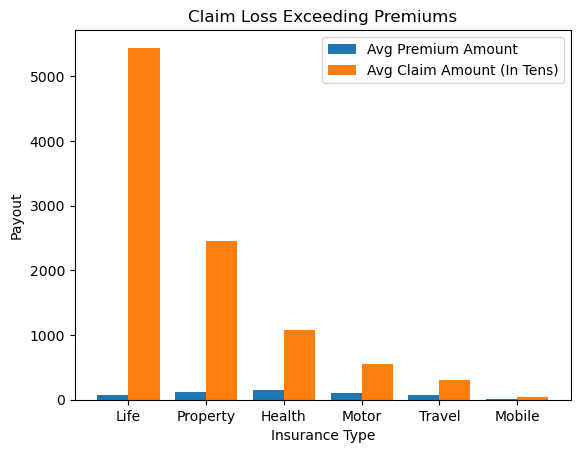

In [30]:
# Plot average amount by insurance type
# Ploting multiple bar charts > https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

x_axis = avg_cost_df.index.values
x_len = np.arange(len(x_axis))
premium = avg_cost_df['Average Premium Amount']
claim = (avg_cost_df['Average Claim Amount']/10)

# Bar plot
plt.bar(x_len - 0.2, premium, 0.4, label = 'Avg Premium Amount') 
plt.bar(x_len + 0.2, claim, 0.4, label = 'Avg Claim Amount (In Tens)')
plt.xticks(x_len, x_axis)

# Label plot
plt.xlabel('Insurance Type') 
plt.ylabel('Payout') 
plt.title('Claim Loss Exceeding Premiums') 
plt.legend()

# Save plot
plt.savefig('CSV Files/ClaimLossExceedingPremiums.png')
# Show plot
plt.show() 

Claims analysis keeps insurance companies current on policy claim trends. This type of analysis not only helps review products for overall performance, but analysis is also instrumental when trying to identify patterns of fraud. For example, if we take a look at our bar chart above we can easily see that the average claim amount for each insurance type over exceeds the premium amount. This type of visual analysis can easily help detect a type of insurance fraud called "padding" which is a term used when claims are being inflated resulting in a much higher payout.

Reference: https://www.iii.org/article/background-on-insurance-fraud

The correlation between average premium and the average claim amount is 0.14.


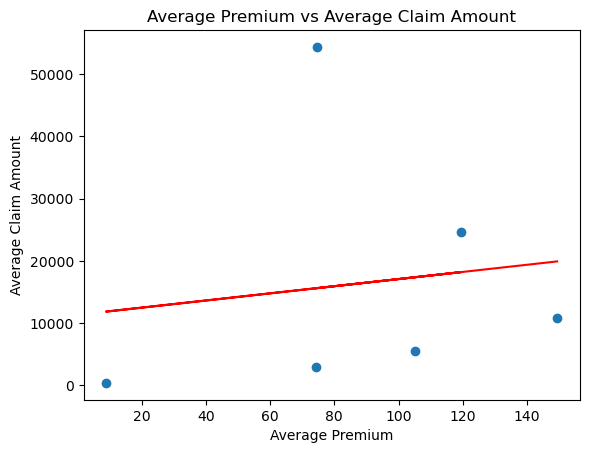

In [31]:
# Calculate correlation to test the relationship between the two variables

correlation = st.pearsonr(avg_cost,avg_claim_amt)
# Linregress() function
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_cost,avg_claim_amt)
regress_values = avg_cost * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot with lin regress function
plt.scatter(avg_cost,avg_claim_amt)
plt.plot(avg_cost, regress_values, "r-")
# Label plot
plt.title('Average Premium vs Average Claim Amount')
plt.xlabel('Average Premium')
plt.ylabel('Average Claim Amount')
# Save plot
plt.savefig('Images/AverageAmountPlot.png')
print(f"The correlation between average premium and the average claim amount is {round(correlation[0],2)}.")
# Show plot
plt.show()

There is extremely little to no correlation seen between premium and claim cost. As premium increase we see a very slight increase in claim amount. Again this is a behavior we would want to investigate. Because the customer is paying a high premium, they feel the need to collect the cost of their insurance policy and profit off of any amount exceeding their premium aount.

In [32]:
# Which risk segment is filing the most insurance claims?
# What is the total claim amount?

claim_count = ins_claim_fraud.groupby(['RISK_SEGMENTATION'])['POLICY_NUMBER'].count()
total_premium = ins_claim_fraud.groupby(['RISK_SEGMENTATION'])['PREMIUM_AMOUNT'].sum()
total_claim = ins_claim_fraud.groupby(['RISK_SEGMENTATION'])['CLAIM_AMOUNT'].sum()

risk_seg_dict = {
    'Total Claims': claim_count,
    'Total Premium Amount': total_premium,
    'Total Claim Amount': total_claim
}

risk_seg_df = pd.DataFrame(risk_seg_dict)

risk_seg_df['Total Claim Amount'] = risk_seg_df['Total Claim Amount'].map("${:,.2f}".format)
risk_seg_df['Total Premium Amount'] = risk_seg_df['Total Premium Amount'].map("${:,.2f}".format)
risk_seg_df

,Total Claims,Total Premium Amount,Total Claim Amount
RISK_SEGMENTATION,,,
H,1455,"$128,281.18","$24,481,000.00"
L,4395,"$391,876.26","$72,602,400.00"
M,4150,"$364,928.51","$68,554,900.00"


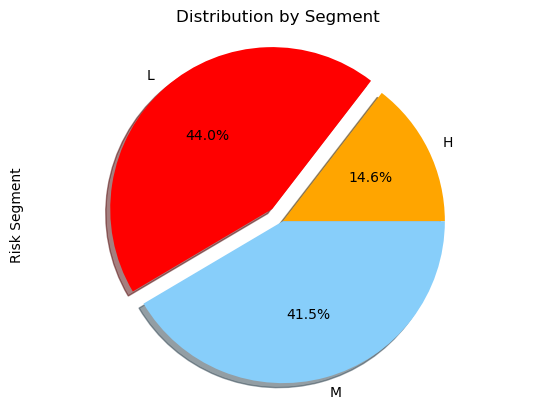

In [33]:
# Create pie chart to show distribution by risk segment
labels = risk_seg_df.index.values
count = risk_seg_df['Total Claims']
colors = ['orange', 'red', 'lightskyblue']
explode = (0, 0.1, 0)

# Plot pie chart
plt.pie(count, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')

# Label plot
plt.title('Distribution by Segment')
plt.ylabel('Risk Segment')
# Save plot
plt.savefig('CSV Files/RiskSegPie.png')
# Show plot
plt.show()

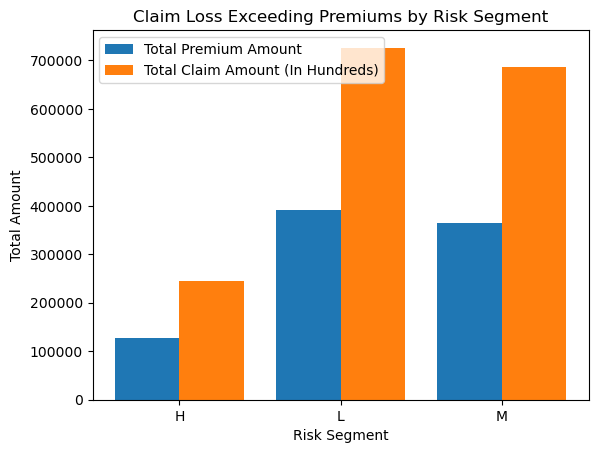

In [36]:
# Plot total premium vs claim by risk segment
x_axis = risk_seg_df.index.values
x_len = np.arange(len(x_axis))
premium = total_premium
claim = (total_claim/100)

# Bar plot
plt.bar(x_len - 0.2, premium, 0.4, label = 'Total Premium Amount') 
plt.bar(x_len + 0.2, claim, 0.4, label = 'Total Claim Amount (In Hundreds)')
plt.xticks(x_len, x_axis)
# Label plot
plt.xlabel('Risk Segment') 
plt.ylabel('Total Amount') 
plt.title('Claim Loss Exceeding Premiums by Risk Segment') 
plt.legend()
# Save plot
plt.savefig('CSV Files/RiskSegBar.png')
# Show plot
plt.show()

Based on the risk assessment, insurance companies determine the premium amount that the insured person must pay. Usually higher-risk individuals are charged a higher premium because they are more likely to make claims. Looking at the distribution of claims made in each segment, we can see that the high-risk segment is actually the one submitting the least amount of claims with 44% of the claims coming from the low-risk segment.

If we drill down a little deeper and compare the premium amount versus the total claim amount, we can clearly see that the total claim amount is significantly higher than the premium paid in the low-risk segment raising suspicions of insurance fraud.